# Exploração e Análise de Dados (EDA)

"A Análise Exploratória de Dados refere-se ao processo crítico de realizar investigações iniciais sobre os dados, a fim de descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de **estatísticas resumidas** e **representações gráficas**".

Fonte: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

# Porque analisar dados?

* Detecção de erros
* Verificação de premissas
* Seleção preliminar de modelos
* Determinar relações entre as variáveis, e
* Avaliação preliminar de relações entre as assessing the direction and rough size of relationships between explanatory and outcome variables.

# Conceitos Básicos


## Variáveis

* Características/atributos do fenômeno observado
* São as colunas da tabela de dados

## Classificação das variáveis

* Papel (Exploratória ou Resultante)
* Tipo (Categórica ou Quantitativa)

## Classificação da análise

* Gráfico x Não-gráfico
* Univariada x Multivariada


# Visão geral das principais bibliotecas

* Matplotlib: low level, provides lots of freedom
* Pandas Visualization: easy to use interface, built on Matplotlib
* Seaborn: high-level interface, great default styles
* ggplot: based on R’s ggplot2, uses Grammar of Graphics
* Plotly: can create interactive plots

Fonte: https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed

# COVID-19

* Causada pelo vírus SARS-COV-2
* Identificada em Wuhan, Hubei, China.
* Sintomas reportados em 1º de dezembro de 2019.
* Os primeiros casos estão conectados com o mercado First cases were linked to contact with the Mercado Atacadista de Frutos do Mar de Huanan, que também vende animais vivos.
* Em 30 de janeiro, a OMS declarou o surto uma Emergência de Saúde Pública de Interesse Internacional.
* Um infectado pode transmitir o vírus para até 3 pessoas.

Fontes: https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons/data#COVID-19,

https://g1.globo.com/ciencia-e-saude/noticia/2020/01/27/paciente-infectado-por-coronavirus-pode-transmitir-a-doenca-para-ate-tres-pessoas-diz-estudo-britanico.ghtml

# Dataset: COVID-19

Column Description: covid19data.csv

* Sno - Serial number
* ObservationDate - Date of the observation in MM/DD/YYYY
* Province/State - Province or state of the observation (Could be empty when missing)
* Country/Region - Country of observation
* Last Update - Time in UTC at which the row is updated for the given 
province or country. (Not standardised and so please clean before using it)
* Confirmed - Cumulative number of confirmed cases till that date
* Deaths - Cumulative number of of deaths till that date
* Recovered - Cumulative number of recovered cases till that date
2019ncovdata.csv

This is old dataset and not being updated now

Fonte: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

# Importar arquivo CSV para o Colab

Aviso: com o código abaixo, o arquivo csv não será persistido nesse notebook.

In [0]:
from google.colab import files
uploaded = files.upload()

# Acesso ao Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando bibliotecas


In [0]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

register_matplotlib_converters()
plt.style.use('seaborn')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Ler arquivo CSV


In [0]:
df = pd.read_csv('2019_nCoV_data.csv')

print(df.shape)

(1719, 8)


# Pandas

## DataFrames

In [0]:
type(df)

pandas.core.frame.DataFrame

## Series

In [0]:
type(df.Country)

pandas.core.series.Series

## Acessando dados


In [0]:
df_countries = df.Country
df_countries.unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium',
       'Others', 'Egypt'], dtype=object)

In [0]:
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 8 columns):
Sno               1719 non-null int64
Date              1719 non-null object
Province/State    1257 non-null object
Country           1719 non-null object
Last Update       1719 non-null object
Confirmed         1719 non-null float64
Deaths            1719 non-null float64
Recovered         1719 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 107.6+ KB
None


In [0]:
print(df.describe())

               Sno     Confirmed       Deaths    Recovered
count  1719.000000   1719.000000  1719.000000  1719.000000
mean    860.000000    454.596859    10.441536    44.361838
std     496.376873   3712.529032   106.638286   351.078713
min       1.000000      0.000000     0.000000     0.000000
25%     430.500000      2.000000     0.000000     0.000000
50%     860.000000     12.000000     0.000000     0.000000
75%    1289.500000    109.000000     0.000000     7.000000
max    1719.000000  59989.000000  1789.000000  7862.000000


# Pré-processamento dos dados

## Limpeza de dados (data cleansing)

In [0]:
# remove time from Date
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()
df['Last Update'] = pd.to_datetime(df['Last Update']).dt.normalize()

dates = df[['Date', 'Last Update']]
dates['Check'] = df['Date'] == df['Last Update']

print(dates.query('Check == False').shape)

(938, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Still Infected']

# still infected = confirmed - deaths - recovered
df['Still Infected'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# replacing Mainland China with just China
df['Country'] = df['Country'].replace('Mainland China', 'China')

# filling missing values 
df[['Province/State']] = df[['Province/State']].fillna('NA')
df[cases] = df[cases].fillna(0)

# remove time from Date
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()

df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Still Infected
0,1,2020-01-22,Anhui,China,2020-01-22,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,China,2020-01-22,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,China,2020-01-22,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,China,2020-01-22,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,China,2020-01-22,0.0,0.0,0.0,0.0


## Tabelas de análise

In [0]:
full_table_italy = df.query('Country == "Italy"')
print(full_table_italy.shape)

full_table_south_korea = df.query('Country == "South Korea"')
print(full_table_south_korea.shape)

full_table_china = df.query('Country == "China"')
print(full_table_china.shape)

(19, 9)
(27, 9)
(835, 9)


# Processamento dos dados

## Indexação


In [0]:
full_table_china.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1666, 1667, 1668, 1669, 1670, 1672, 1673, 1674, 1681, 1708],
           dtype='int64', length=835)

In [0]:
df_index_date = full_table_china.set_index('Date')
df_index_date.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Still Infected
Date,,,,,,,,
2020-01-22,1,Anhui,China,2020-01-22,1.0,0.0,0.0,1.0
2020-01-22,2,Beijing,China,2020-01-22,14.0,0.0,0.0,14.0
2020-01-22,3,Chongqing,China,2020-01-22,6.0,0.0,0.0,6.0
2020-01-22,4,Fujian,China,2020-01-22,1.0,0.0,0.0,1.0
2020-01-22,5,Gansu,China,2020-01-22,0.0,0.0,0.0,0.0


## Consulta de valores com Query

In [0]:
df.query('Country == "China"').head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Still Infected
0,1,2020-01-22,Anhui,China,2020-01-22,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,China,2020-01-22,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,China,2020-01-22,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,China,2020-01-22,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,China,2020-01-22,0.0,0.0,0.0,0.0


In [0]:
df.query('Country in ["China", "South Korea", "Italy"]').head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Still Infected
0,1,2020-01-22,Anhui,China,2020-01-22,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,China,2020-01-22,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,China,2020-01-22,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,China,2020-01-22,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,China,2020-01-22,0.0,0.0,0.0,0.0


In [0]:
df.query('Confirmed > 10000').head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Still Infected
564,565,2020-02-02,Hubei,China,2020-02-02,11177.0,350.0,295.0,10532.0
631,632,2020-02-03,Hubei,China,2020-04-02,13522.0,414.0,396.0,12712.0
700,701,2020-02-04,Hubei,China,2020-04-02,16678.0,479.0,522.0,15677.0
770,771,2020-02-05,Hubei,China,2020-05-02,16678.0,479.0,538.0,15661.0
840,841,2020-02-06,Hubei,China,2020-06-02,22112.0,618.0,817.0,20677.0


## Seleção de colunas

In [0]:
df[['Country', 'Confirmed', 'Deaths', 'Recovered']].head()

,Country,Confirmed,Deaths,Recovered
0,China,1.0,0.0,0.0
1,China,14.0,0.0,0.0
2,China,6.0,0.0,0.0
3,China,1.0,0.0,0.0
4,China,0.0,0.0,0.0


## Agregação de Dados

In [0]:
df_agg = df[['Country', 'Confirmed', 'Deaths', 'Recovered']]
df_agg = df_agg.groupby(['Country']).sum().reset_index()

df_agg.head(10)

,Country,Confirmed,Deaths,Recovered
0,Australia,284.0,0.0,70.0
1,Belgium,14.0,0.0,1.0
2,Brazil,0.0,0.0,0.0
3,Cambodia,22.0,0.0,6.0
4,Canada,116.0,0.0,6.0
5,China,773500.0,17908.0,75440.0
6,Egypt,4.0,0.0,0.0
7,Finland,20.0,0.0,7.0
8,France,186.0,3.0,18.0
9,Germany,252.0,0.0,5.0


In [0]:
df_agg.sort_values('Confirmed', ascending=False).head()

,Country,Confirmed,Deaths,Recovered
5,China,773500.0,17908.0,75440.0
19,Others,2161.0,0.0,0.0
22,Singapore,797.0,0.0,122.0
10,Hong Kong,681.0,14.0,8.0
14,Japan,591.0,5.0,91.0


# Visualização de dados

## Scatterplot

In [0]:
def scatterplot(df_table, title):
  df_scatter = df_table[['Date', 'Province/State', 'Confirmed', 'Deaths', 'Still Infected']]
  df_scatter = df_scatter.groupby(['Date']).sum().reset_index()

  plt.plot_date(df_scatter['Date'], df_scatter['Still Infected'])
  plt.gcf().autofmt_xdate()
  plt.xlabel('Date')
  plt.title(title)
  plt.tight_layout()
  plt.show()

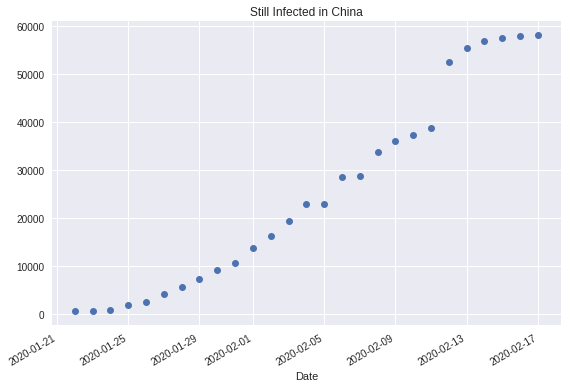

In [0]:
scatterplot(full_table_china, 'Still Infected in China')

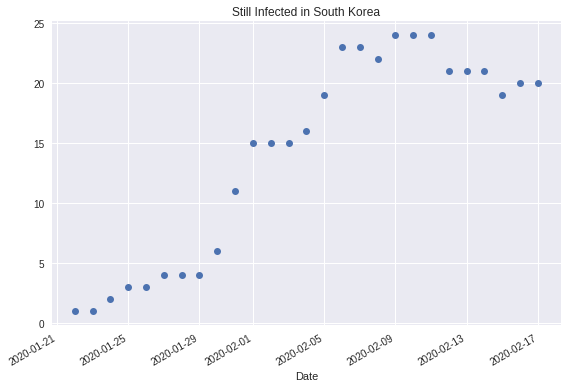

In [0]:
scatterplot(full_table_south_korea, 'Still Infected in South Korea')

## Barplots

             Type      Number      Country
0          Deaths    2.315191        China
1       Recovered    9.753070        China
2  Still Infected   87.931739        China
0          Deaths    0.000000  South Korea
1       Recovered   14.189189  South Korea
2  Still Infected   85.810811  South Korea
0          Deaths    0.000000        Italy
1       Recovered    0.000000        Italy
2  Still Infected  100.000000        Italy


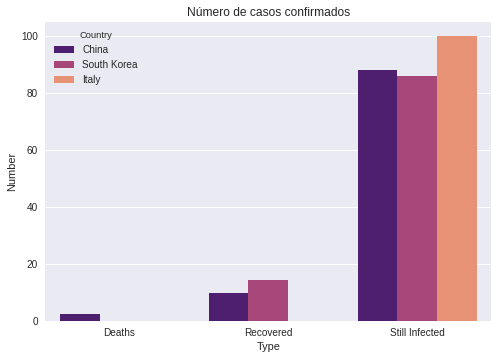

In [0]:
def barplot(table, title):
  sns.barplot(x='Type', y='Number', hue='Country', data=table, palette='magma')
  plt.title(title)
  plt.show()

def calc_porc(table, country):
  partial = table.groupby(['Country'], as_index=False).sum()
  total = partial['Confirmed'].loc[0]
  partial = partial[['Deaths', 'Recovered', 'Still Infected']]
  partial = (partial * 100) / total
  partial = partial.transpose().reset_index()
  partial = partial.rename(columns={'index': 'Type', 0: 'Number'})
  partial['Country'] = country
  return partial

china = calc_porc(full_table_china, 'China')
south_korea = calc_porc(full_table_south_korea, 'South Korea')
italy = calc_porc(full_table_italy, 'Italy')

data = pd.concat([china, south_korea, italy])
print(data.head(20))
barplot(data, 'Número de casos confirmados')


# Outras perguntas...

* Qual a probabilidade de contrair a doença em voos?
* Quão mais "perigosa" é COVID-19 em comparação com SARS e Ebola?
* A temperatura do ambiente pode impactar na taxa de transmissão do vírus?
* Qual(is) as faixas etárias mais atingidas pela doença?

# Take Away

* Definição do problema
* **PERGUNTAS** sobre o problema
* Coleta de dados
* Limpeza de dados
* Análise de dados (tabular ou visualização)
* Resultados da analise

# Resumo

*   Matemática
  * Estatística
  * Álgebra linear
  * Probabilidade
  * ...

*   Ferramentas
  * Numpy
  * Pandas
  * Statsmodels
  * Scikit-learn

* Visualização (D3, Matplotlib, seaborn, ...)

* Dados!
  * Kaggle
  * Reddit




# Referências


https://colab.research.google.com/drive/1a4sbKG7jOJGn4oeonQPA8XjJm7OYgcdX#scrollTo=wb0PmFpoG9ay
https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb?hl=en#scrollTo=JndnmDMp66FL
https://github.com/CSSEGISandData/COVID-19/

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#time_series_covid_19_confirmed.csv

https://www.ime.usp.br/~pam/cdados.pdf
https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf

https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

https://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb

https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200306-sitrep-46-covid-19.pdf?sfvrsn=96b04adf_2

https://minerandodados.com.br/analise-de-dados-com-python-usando-pandas/
